
Raul Jimenez 19017
Donaldo Garcia 19683

# Laboratorio 4 - Aprendizaje profundo para la clasificación de imágenes


Siga las instrucciones en negritas para completar el laboratorio.

------------

## El reto

**Su tarea es la de construir un clasificador de imágenes usando Keras (Tensorflow) y Redes Neuronales Convolucionales (CNN) para un conjunto de datos conocido como "Fashion MNIST dataset""
. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 by 28 *escalagris*. Hay un conjunto de datos de entrenamiento de 60,000 imágenes y un conjunto de datos de prueba de 10,000 imágenes.**

    Etiqueta	Descripción
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los datos

**Tarea 1: Ejecute el siguiente código para descargar los datos usando Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

(X_entreno, y_entreno), (X_prueba, y_prueba) = fashion_mnist.load_data()

## Visualización de los Datos

**TAREA 2: Utilice matplotlib para visualizar una imagen del conjunto de datos.  Puede ser cualquier imagen del conjunto de datos.**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

image = X_entreno[0]

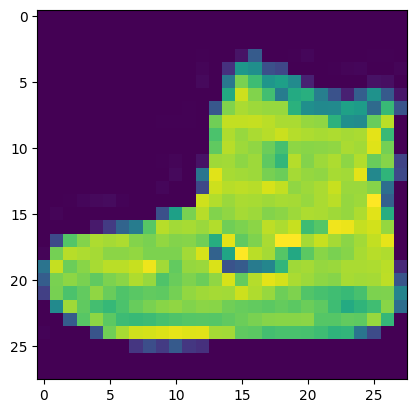

In [5]:
plt.imshow(image)

In [6]:
image.shape

(28, 28)

## Preprocesamiento de los Datos

**TAREA 3: Normalice los datos X entreno y X prueba dividiendo por el valor máximo de los arreglos de las imágenes.**

In [7]:
image.max()

255

In [8]:
X_entreno = X_entreno / 255.0
X_prueba = X_prueba / 255.0
first_normaliced_image = X_entreno[0]
print(first_normaliced_image.max())

1.0


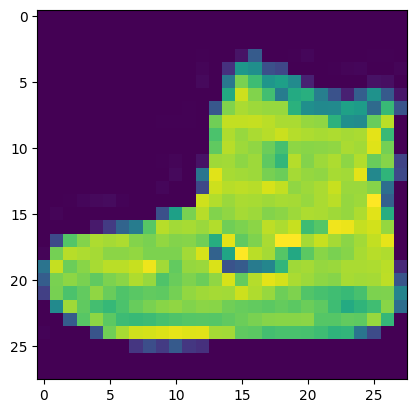

In [9]:
plt.imshow(first_normaliced_image)

**TAREA 4: Cambie el formato de los arreglos X para que incluyan una 4rta dimensión del canal de color. Similar a lo que se hizo en clase para el conjunto de datos MNIST de números.**

In [10]:
print(X_entreno.shape)
print(X_prueba.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
X_entreno = X_entreno.reshape(60000, 28, 28, 1)
X_prueba = X_prueba.reshape(10000, 28, 28, 1)

In [12]:
print(X_entreno.shape)
print(X_prueba.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**TAREA 5: Convierta los valores de y_entreno y y_prueba para que estén "one-hot encoded" para poder hacer un análisis categórico con Keras.**

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
print(y_entreno.shape)
print(y_prueba.shape)

(60000,)
(10000,)


In [15]:
y_cat_entreno = to_categorical(y_entreno, 10)

In [16]:
y_cat_prueba = to_categorical(y_prueba, 10)

## Configuración del Modelo

**TAREA 6: Utilice Keras para crear un modelo que contenga, al menos, las siguientes capas (pero siéntase en libertad de experimentar):**

* Capa "2D Convolutional", filtros = 32 y tamaño_kernel = (4, 4)
* Capa de "Pooling""
 de tamaño = (2, 2)

* Capa de Aplanado
* Capa Densa (128 unidades, pero siéntase en libertad de "jugar"con este valor), activación RELU

* Una capa Final Densa de 10 unidades con activación softmax

**Luego compile el modelo con estos parámetros: loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
modelo = Sequential()
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))
modelo.add(MaxPool2D(pool_size = (2, 2)))
modelo.add(Flatten())
modelo.add(Dense(128, activation = 'relu'))
modelo.add(Dense(10, activation = 'softmax'))

In [19]:
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

### Entrenamiento del Modelo
**TAREA 6: Entrene/Ajuste el modelo con el conjunto X_entreno set. La cantidad de épocas le queda a Ud determinar.**

In [20]:
modelo.fit(X_entreno, y_cat_entreno, epochs = 10, validation_data = (X_prueba,y_cat_prueba))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3936 - accuracy: 0.8604 - val_loss: 0.3245 - val_accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2735 - accuracy: 0.9018 - val_loss: 0.2894 - val_accuracy: 0.8944
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2345 - accuracy: 0.9151 - val_loss: 0.2875 - val_accuracy: 0.9007
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2120 - accuracy: 0.9232 - val_loss: 0.2678 - val_accuracy: 0.9067
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1923 - accuracy: 0.9306 - val_loss: 0.2718 - val_accuracy: 0.9061
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1781 - accuracy: 0.9366 - val_loss: 0.3153 - val_accuracy: 0.9055
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1663 - accuracy: 0.9410 - val_loss: 0.2842 -

### Evaluación del Modelo

**TAREA 7: Muestre los valores de [accuracy, precision, recall, f1-score] que logró el modelo con el conjunto de datos X_prueba data set. Tenga en mente que hay múltiples formas de hacer esto.  Sin embargo, le recomendamos que utilice el mismo procedimiento usado mencionado en la parte de intuición, en clase.**

In [21]:
prediction = np.argmax(modelo.predict(X_prueba),axis=1)

313/313 [==============================] - 4s 4ms/step


In [22]:
print(classification_report(y_prueba, prediction))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.87      0.84      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.96      0.99      0.97      1000
           6       0.72      0.77      0.74      1000
           7       0.97      0.94      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [23]:
matrix = confusion_matrix(y_prueba, prediction)

<AxesSubplot:>

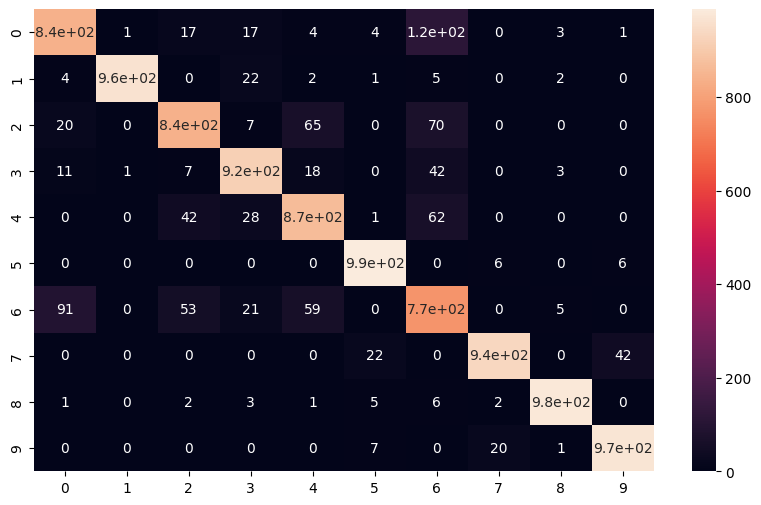

In [24]:
plt.figure(figsize = (10, 6))
sns.heatmap(matrix,annot = True)

In [25]:
print(modelo.metrics_names)
print(modelo.evaluate(X_prueba,y_cat_prueba, verbose = 0))

['loss', 'accuracy']
[0.323285847902298, 0.9071999788284302]


# Gran trabajo!